In [35]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [36]:
def imhist(img):
    row, col = img.shape
    h = [0] * 256

    for i in range(row):
        for j in range(col):
            h[img[i, j]] += 1
    
    return np.array(h)/(row*col)

def cumsum(h):
    return [sum(h[:i+1]) for i in range(len(h))]

def hist_eq(img):
    h = imhist(img)
    cdf = np.array(cumsum(h)) 
    sk = np.uint8(255 * cdf)
    s1, s2 = img.shape
    Y = np.zeros_like(img)
    
    for i in range(s1):
        for j in range(s2):
            Y[i, j] = sk[img[i, j]]
            
    H = imhist(Y)
    return Y, h, H, sk

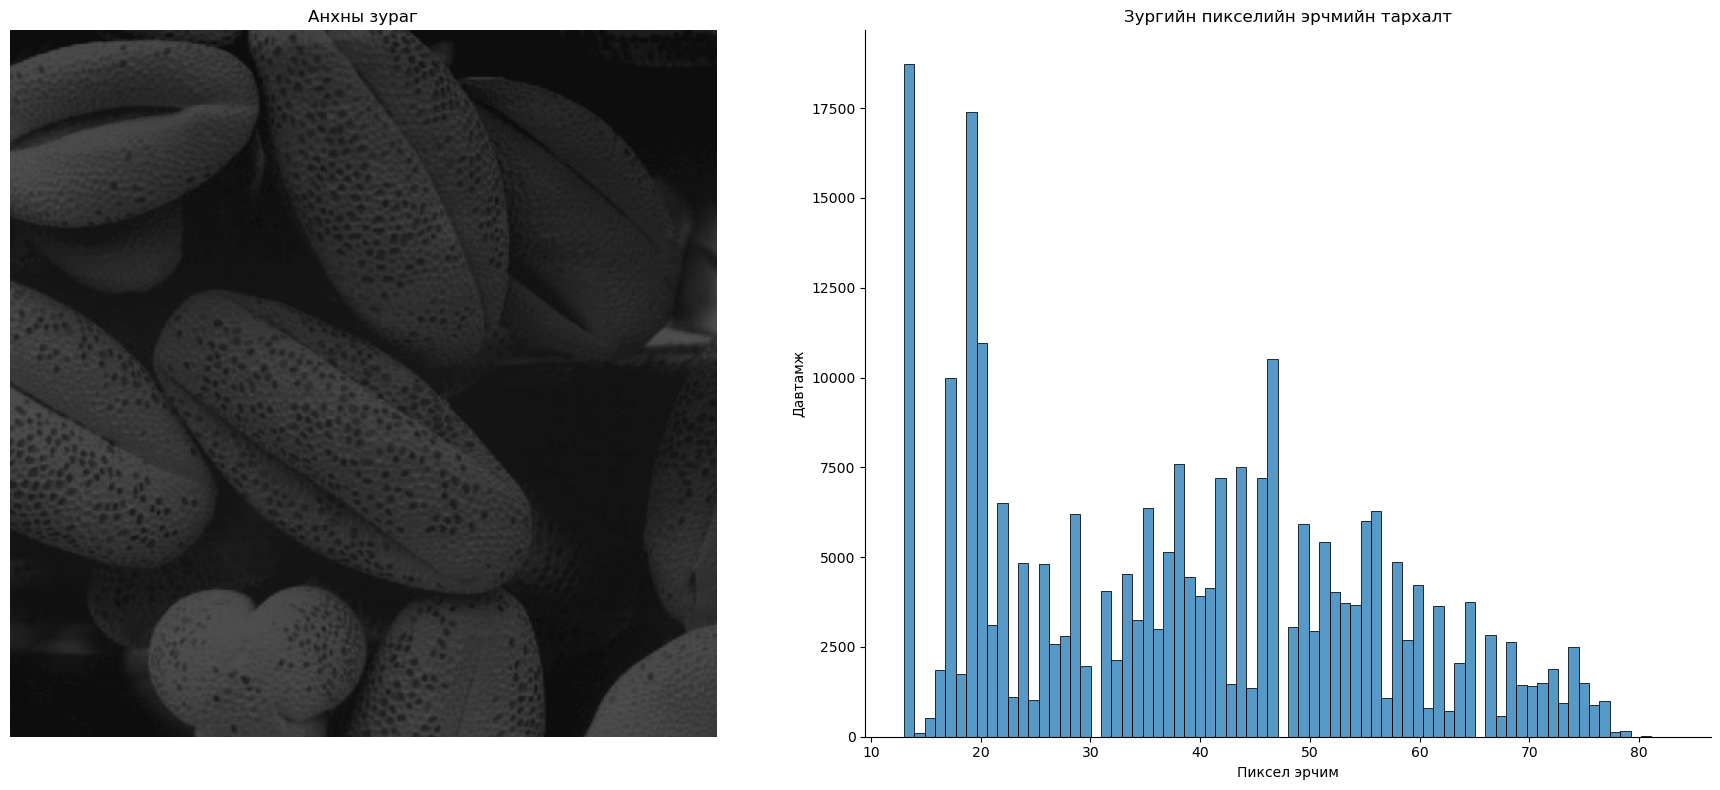

In [37]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0316(4)(bottom_left).tif")
img = np.asarray(img)

#img_hist = cv2.calcHist(img, [0], None, [256], [0, 256])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
ax1.imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
ax1.set_title("Анхны зураг")
ax1.axis('off')

sns.histplot(img.flatten(), stat = "frequency", bins = 'auto', ax = ax2)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel("Пиксел эрчим");
ax2.set_ylabel("Давтамж")
ax2.set_title("Зургийн пикселийн эрчмийн тархалт");

fig.tight_layout()
fig.savefig("./plots/global_hist_eq_task_1.png", dpi = 300);

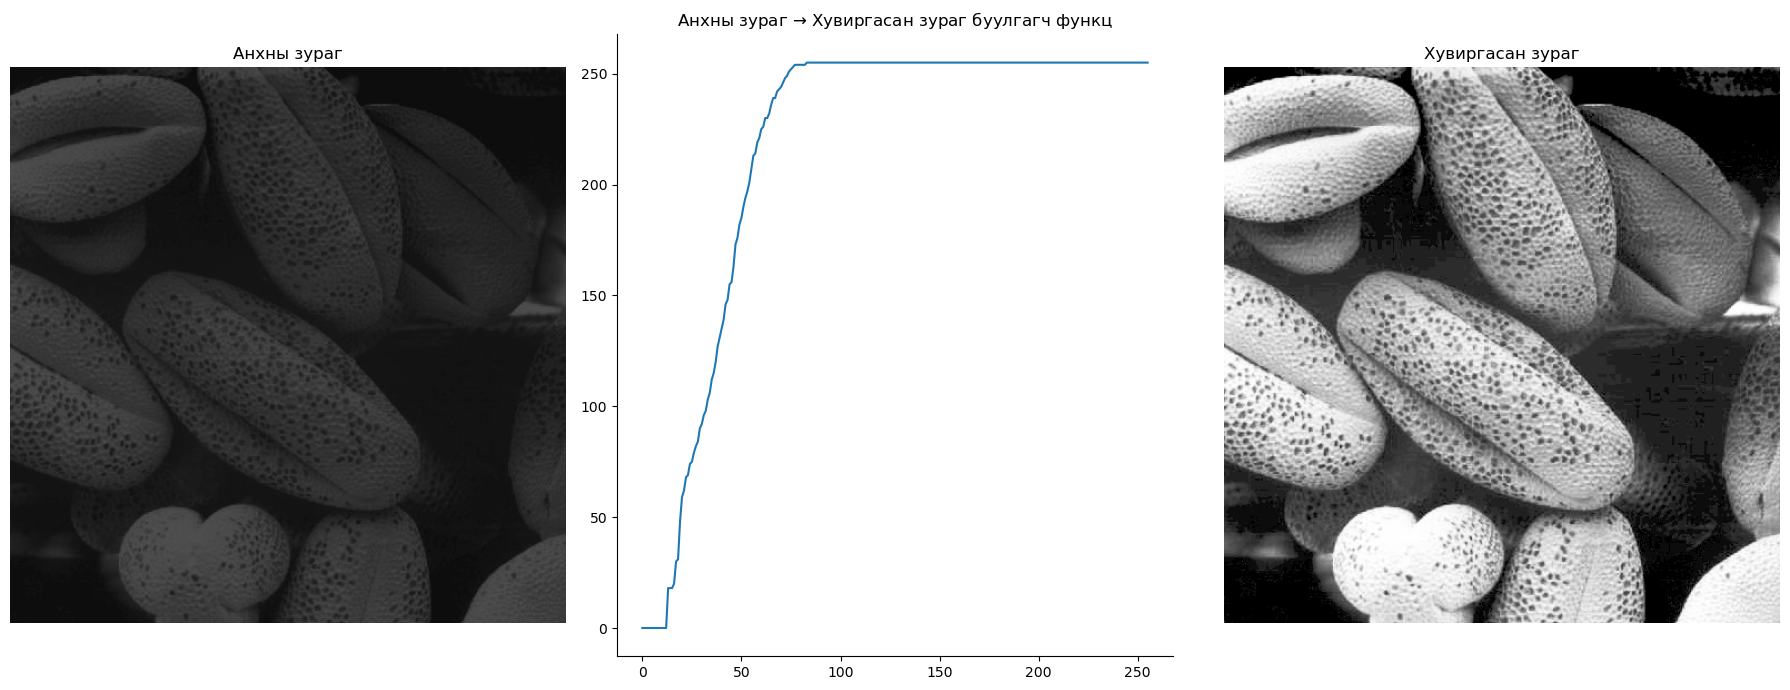

In [38]:
Y, h, H, sk = hist_eq(img)

fig, axes = plt.subplots(1, 3, figsize = (18, 7))


axes[0].set_title('Анхны зураг')
axes[0].axis('off')
axes[0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)

axes[1].set_title(r'Анхны зураг $\to$ Хувиргасан зураг буулгагч функц')
axes[1].plot(sk)
axes[1].spines['right'].set_visible(False)
axes[1].spines['top'].set_visible(False)

axes[2].set_title('Хувиргасан зураг')
axes[2].axis('off')
axes[2].imshow(Y, cmap='gray')

fig.tight_layout()
fig.savefig("./plots/global_hist_eq_task_2.png", dpi = 300)

In [39]:
df_len = len(img.flatten())
pixel_int_df = pd.DataFrame({'pixel': list(img.flatten()) + list(Y.flatten()),
                             'type': ['Анхны пиксел эрчим'] * df_len + ['Глобал филтер пиксел эрчим'] * df_len})

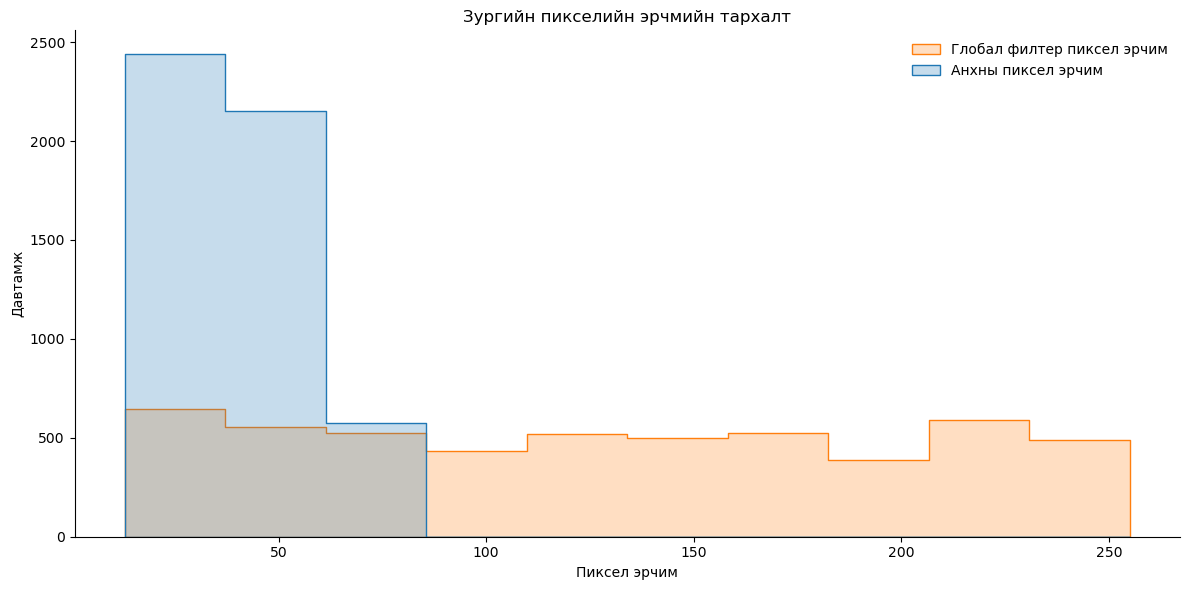

In [40]:
fig, ax = plt.subplots( figsize = (12, 6))

sns.histplot(data = pixel_int_df, x = 'pixel', hue = 'type', stat = "frequency", 
             bins = 10, element = "step", ax = ax, legend = False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Пиксел эрчим");
ax.set_ylabel("Давтамж")
ax.set_title("Зургийн пикселийн эрчмийн тархалт")
ax.legend(['Глобал филтер пиксел эрчим', 'Анхны пиксел эрчим'], frameon = False)

fig.tight_layout()
fig.savefig("./plots/global_hist_eq_task_3.png")

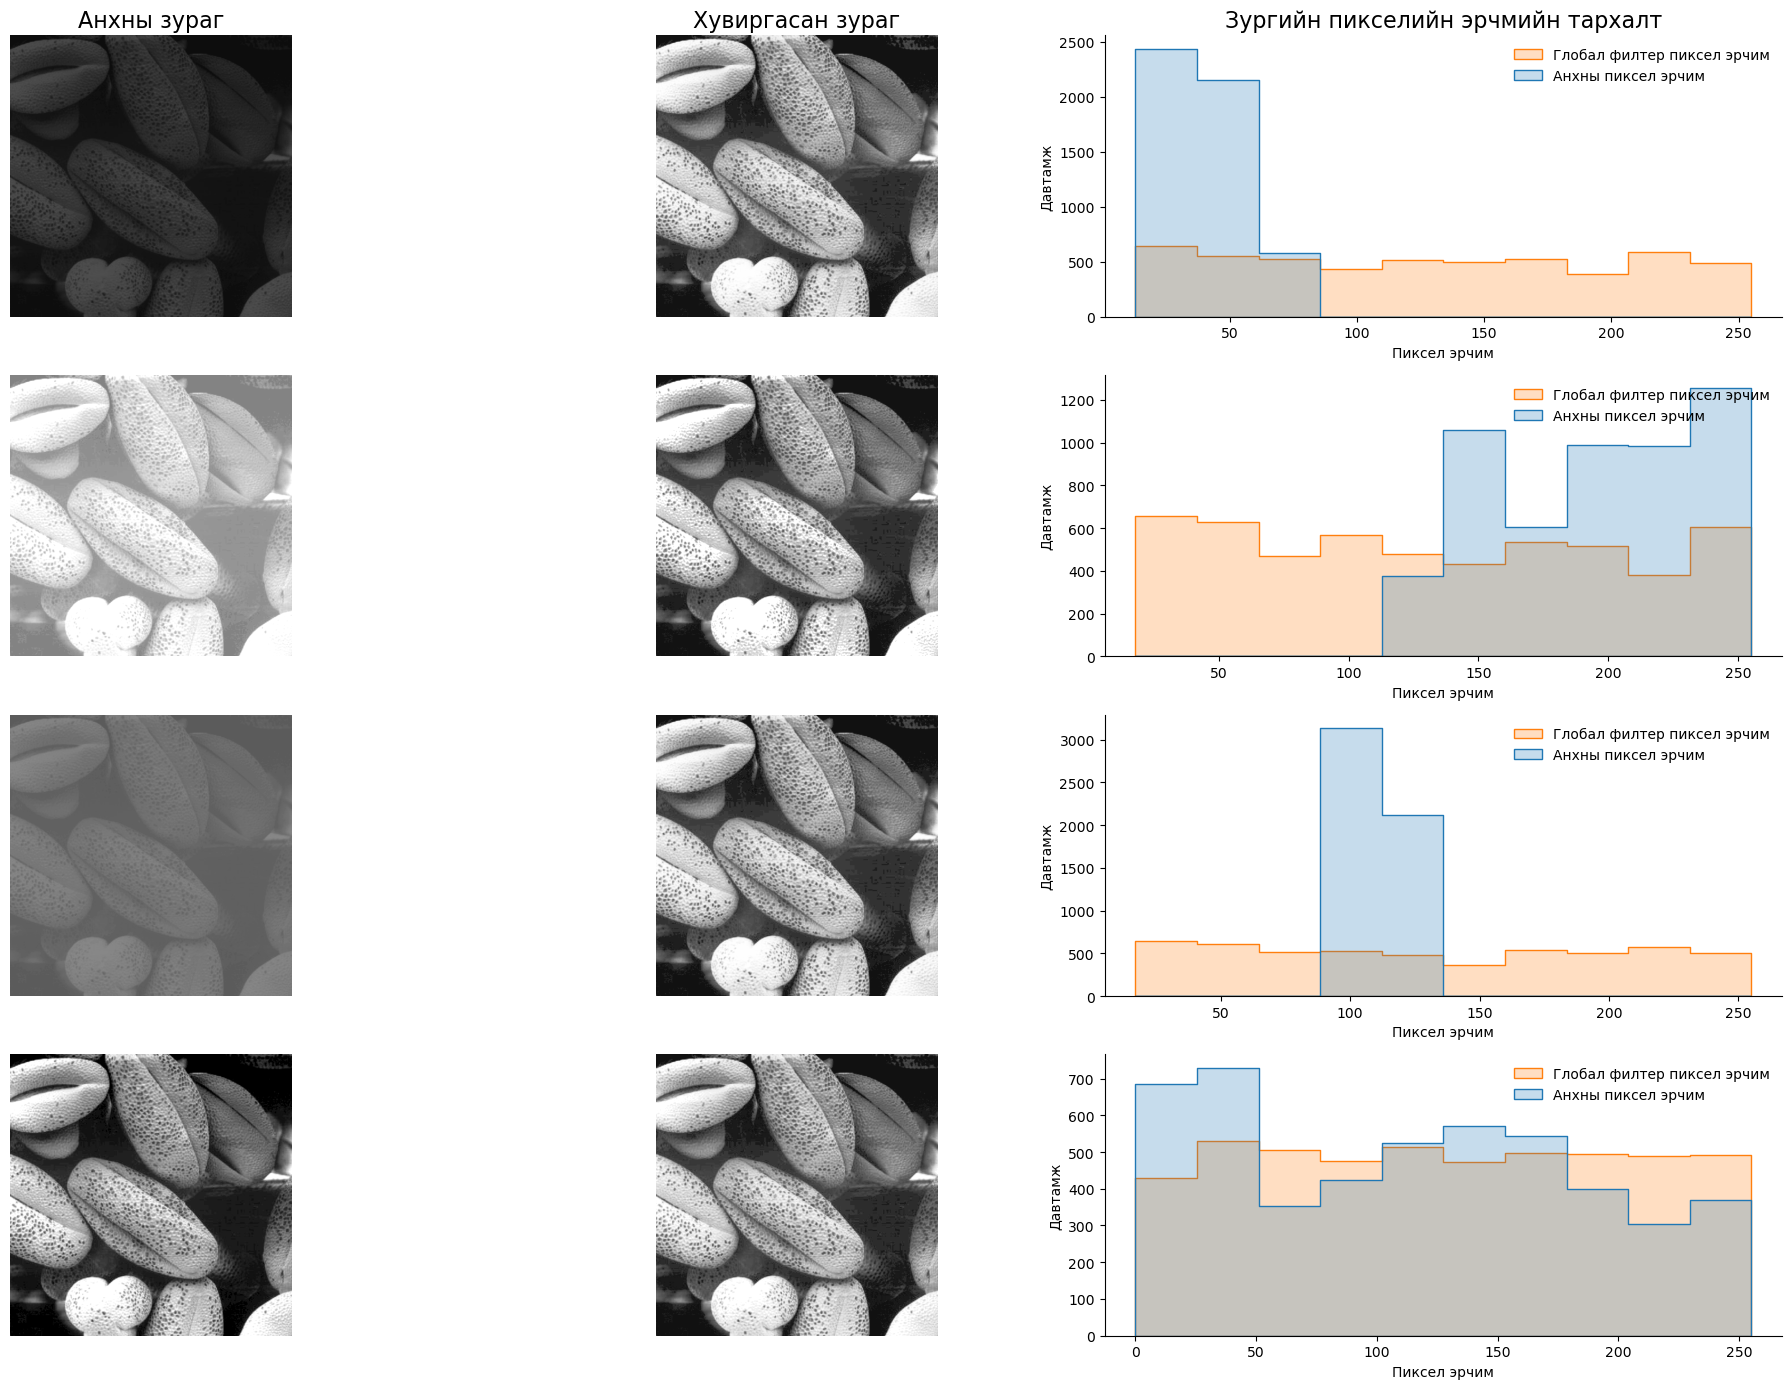

In [41]:
img_dir = "../../DIP3E_Original_Images_CH03"
img_names = ["Fig0316(4)(bottom_left).tif", "Fig0316(1)(top_left).tif", 
             "Fig0316(2)(2nd_from_top).tif", "Fig0316(3)(third_from_top).tif"]

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 14))

for ind in range(4):
    img = Image.open(f"{img_dir}/{img_names[ind]}")
    img = np.asarray(img)
    Y, h, H, sk = hist_eq(img)

    cv_img_eq = cv2.equalizeHist(img)

    axes[ind][0].imshow(img, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][0].axis('off')

    axes[ind][1].imshow(Y, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][1].axis('off')
    
    df_len = len(img.flatten())
    pixel_int_df = pd.DataFrame({'pixel': list(img.flatten()) + list(Y.flatten()),
                                'type': ['Анхны пиксел эрчим'] * df_len + ['Глобал филтер пиксел эрчим'] * df_len})
    
    sns.histplot(data = pixel_int_df, x = 'pixel', hue = 'type', stat = "frequency", 
                bins = 10, element = "step", ax = axes[ind][2], legend = False)
    axes[ind][2].spines[['right', 'top']].set_visible(False)
    axes[ind][2].set_xlabel("Пиксел эрчим");
    axes[ind][2].set_ylabel("Давтамж")
    axes[ind][2].legend(['Глобал филтер пиксел эрчим', 'Анхны пиксел эрчим'], frameon = False)

cols = ["Анхны зураг", "Хувиргасан зураг", "Зургийн пикселийн эрчмийн тархалт"]
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize = 16)

fig.tight_layout()
fig.savefig("./plots/global_hist_eq_task_4.png")

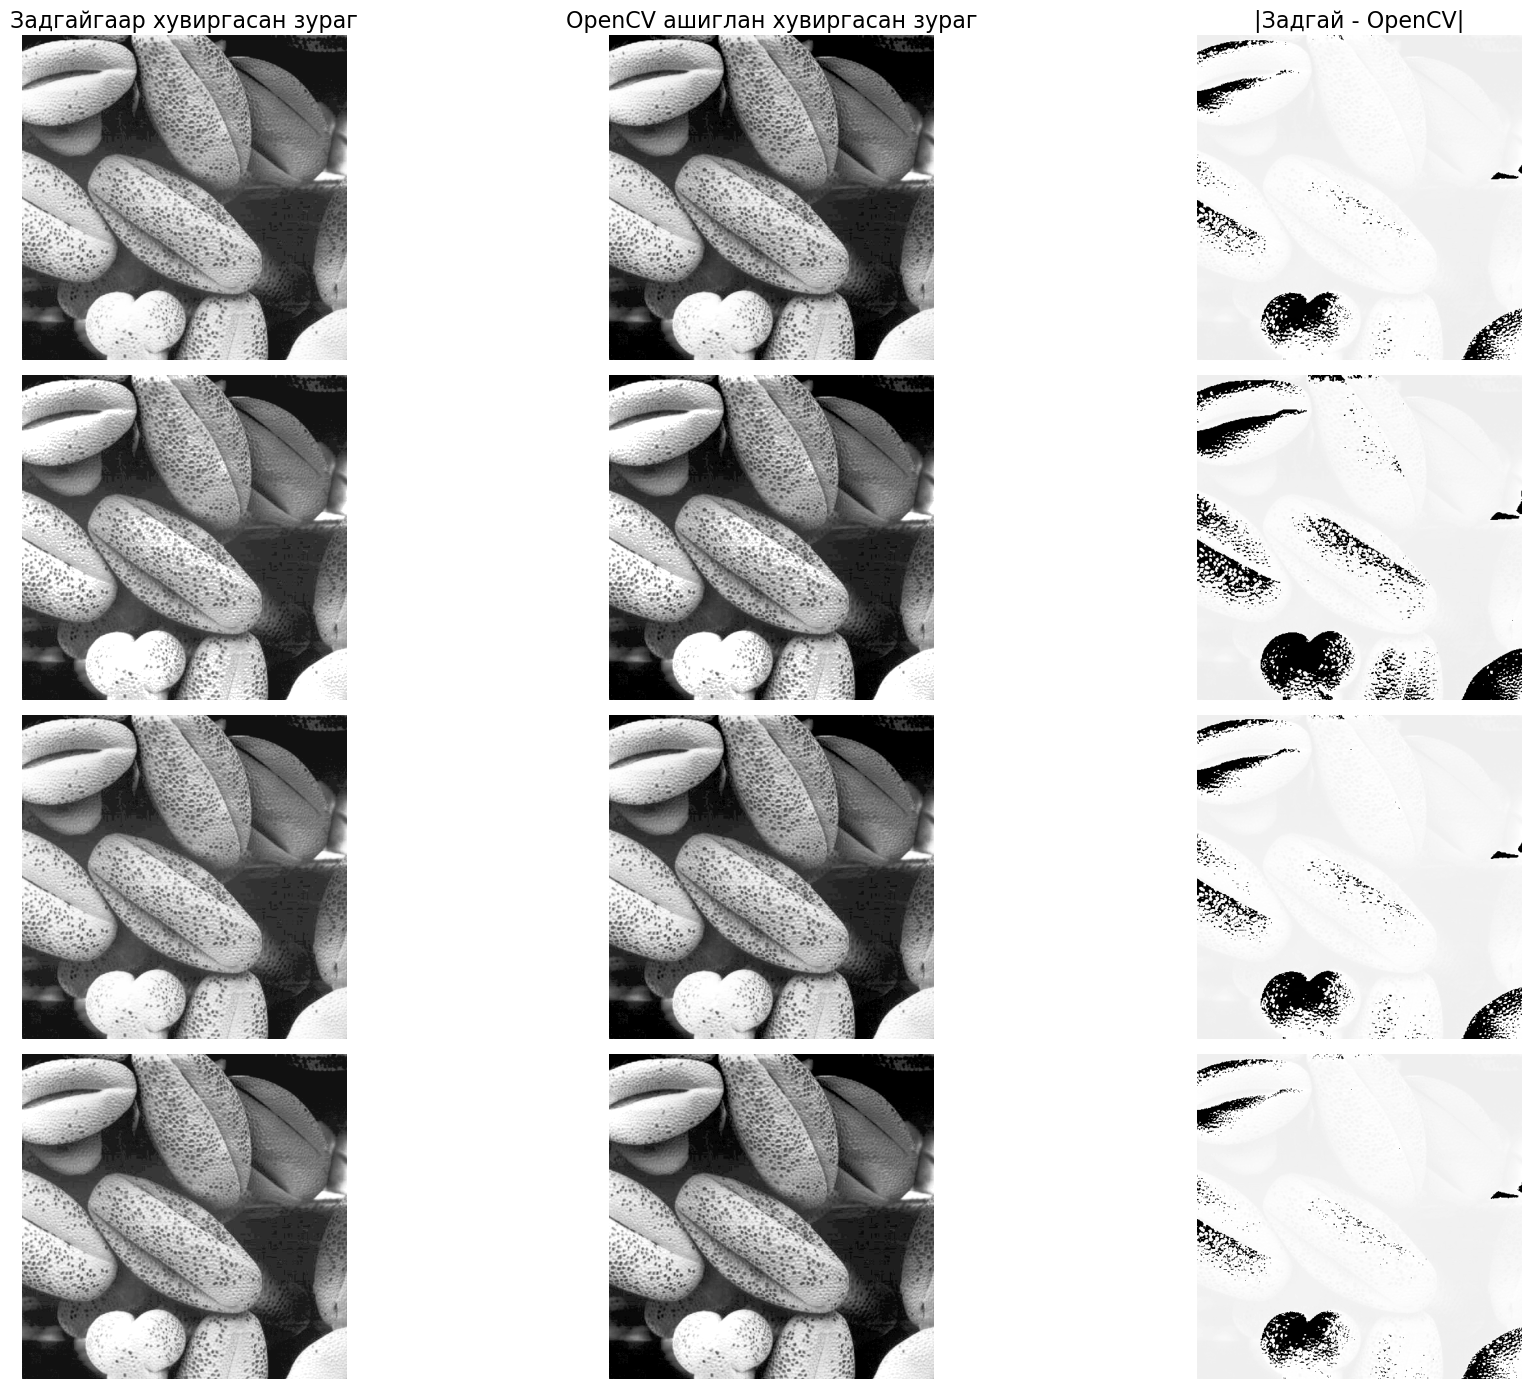

In [42]:
img_dir = "../../DIP3E_Original_Images_CH03"
img_names = ["Fig0316(4)(bottom_left).tif", "Fig0316(1)(top_left).tif", 
             "Fig0316(2)(2nd_from_top).tif", "Fig0316(3)(third_from_top).tif"]

fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (20, 14))

for ind in range(4):
    img = Image.open(f"{img_dir}/{img_names[ind]}")
    img = np.asarray(img)
    Y, h, H, sk = hist_eq(img)

    cv_img_eq = cv2.equalizeHist(img)
    img_diff = abs(Y - cv_img_eq)*255

    axes[ind][0].imshow(Y, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][1].imshow(cv_img_eq, cmap = 'gray', vmin = 0, vmax = 255)
    axes[ind][2].imshow(img_diff, cmap = 'gray', vmin = 0, vmax = 255)

    axes[ind][0].axis('off')
    axes[ind][1].axis('off')
    axes[ind][2].axis('off')

cols = ["Задгайгаар хувиргасан зураг", "OpenCV ашиглан хувиргасан зураг",
        "|Задгай - OpenCV|"]
for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize = 16)

fig.tight_layout()
plt.show()
fig.savefig("./plots/global_hist_eq_task_5.png")